In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from hdf5storage import savemat
from hdf5storage import loadmat
import matplotlib.patches as mpatches
import matplotlib
import pickle
import hickle

import sys
sys.path.append('../../src')

In [2]:
import evaluation.eval_rank as eval_rank
import evaluation.eval_utils as eval_utils

In [3]:
data_path_old = '/data2/data/zebrahim/synthetic_dataset/data_8192_1000_3_4_4_.03_.03_.2' + 'processed_data2.h'
with open(data_path_old, 'r') as fin:
    data_old = hickle.load(fin)
index_of_changes_old = data_old['index_of_changes']

#data which I trained on abrupt and test on gradual changes
data_path_new = '../../data/synthetic2/' + 'processed2.p'
with open(data_path_new, 'r') as fin:
    data_new = pickle.load(fin)
index_of_changes_new = data_new['index_of_changes']


#mixed new data
data_path_new = '../../data/synthetic2/' + 'processed3.p'
with open(data_path_new, 'r') as fin:
    data_new_3 = pickle.load(fin)
index_of_changes3 = data_new_3['index_of_changes']


data_num_step = 8192

In [4]:
index_of_changes_old.shape, index_of_changes_new.shape

((100, 4), (1000, 4))

In [5]:
data_old['test_data'].shape, data_new['test_data'].shape

((100, 8192, 12), (1000, 8192, 12))

In [18]:
#old CNN, DWN, RCNN
CNN1001_1 = loadmat("../../poc_synthetic/pocCNN1001"+'.mat')['poc']
DWN_2001_1 = loadmat("../../poc_synthetic/pocDWN2001"+'.mat')['poc']

#new CNN, DWN
CNN1001_x = loadmat("../../poc_synthetic/train_abrupt_test_gradual/pocCNN1001_x"+'.mat')['poc']
DWN_1001_x = loadmat("../../poc_synthetic/train_abrupt_test_gradual/pocDWN1001_x"+'.mat')['poc']

#merged training and test part of the third version of synthetic dataset
CNN1001_y = loadmat("../../poc_synthetic/train_abrupt_test_gradual/pocCNN1001_y"+'.mat')['poc']
DWN_1001_y = loadmat("../../poc_synthetic/train_abrupt_test_gradual/pocDWN1001_y"+'.mat')['poc']


In [19]:
cpd_val_CNN32_1, cpd_CNN32_1 = eval_rank.non_max_supression(CNN1001_1, window=15, data_num_step=data_num_step)
cpd_val_DWN32_1, cpd_DWN32_1 = eval_rank.non_max_supression(DWN_2001_1, window=15, data_num_step=data_num_step)

cpd_val_CNN32_x, cpd_CNN32_x = eval_rank.non_max_supression(CNN1001_x, window=15, data_num_step=data_num_step)
cpd_val_DWN32_x, cpd_DWN32_x = eval_rank.non_max_supression(DWN_1001_x, window=15, data_num_step=data_num_step)

cpd_val_CNN32_y, cpd_CNN32_y = eval_rank.non_max_supression(CNN1001_y, window=15, data_num_step=data_num_step)
cpd_val_DWN32_y, cpd_DWN32_y = eval_rank.non_max_supression(DWN_1001_y, window=15, data_num_step=data_num_step)


In [23]:
RCNN_2001_1 = loadmat("../../poc_synthetic/pocCNN-LSTM4001"+'.mat')['poc']
RCNN_1001_x = loadmat("../../poc_synthetic/train_abrupt_test_gradual/pocRCNN1001_x"+'.mat')['poc']
RCNN_1001_y = loadmat("../../poc_synthetic/train_abrupt_test_gradual/pocRCNN1001_y"+'.mat')['poc']

PRN_1001_1 = loadmat("../../poc_synthetic/pocHRNN_synthetic_1"+'.mat')['poc']
PRN_1001_x = loadmat("../../poc_synthetic/train_abrupt_test_gradual/pocHRNN_1001_x"+'.mat')['poc']
PRN_1001_y = loadmat("../../poc_synthetic/train_abrupt_test_gradual/pocHRNN_1001_y"+'.mat')['poc']


In [25]:
cpd_val_RCNN32_1, cpd_RCNN32_1 = eval_rank.non_max_supression(RCNN_2001_1, window=15, data_num_step=data_num_step)
cpd_val_RCNN32_x, cpd_RCNN32_x = eval_rank.non_max_supression(RCNN_1001_x, window=15, data_num_step=data_num_step)
cpd_val_RCNN32_y, cpd_RCNN32_y = eval_rank.non_max_supression(RCNN_1001_y, window=15, data_num_step=data_num_step)

cpd_val_PRN32_1, cpd_PRN32_1 = eval_rank.non_max_supression(PRN_1001_1, window=15, data_num_step=data_num_step)
cpd_val_PRN32_x, cpd_PRN32_x = eval_rank.non_max_supression(PRN_1001_x, window=15, data_num_step=data_num_step)
cpd_val_PRN32_y, cpd_PRN32_y = eval_rank.non_max_supression(PRN_1001_y, window=15, data_num_step=data_num_step)


In [8]:
def tolerance_auc(cpd_val, cpd, gt_mean_test, tolerance):
    out_put = []
    for t in tolerance:
        print t
        out = eval_rank.parallel_ranking(cpd_val, cpd, gt_mean_test, t)
        out_put.append(eval_utils.calc_auc(zip(out[0], out[1]), gt_mean_test))
        
    return out_put    

In [20]:
tolerance = [8, 16, 32, 64, 128, 256, 512]
tol_auc_CNN32_1 = tolerance_auc(cpd_val_CNN32_1, cpd_CNN32_1, index_of_changes_old, tolerance)
tol_auc_DWN32_1 = tolerance_auc(cpd_val_DWN32_1, cpd_DWN32_1, index_of_changes_old, tolerance)

tol_auc_CNN32_x = tolerance_auc(cpd_val_CNN32_x, cpd_CNN32_x, index_of_changes_new, tolerance)
tol_auc_DWN32_x = tolerance_auc(cpd_val_DWN32_x, cpd_DWN32_x, index_of_changes_new, tolerance)

tol_auc_CNN32_y = tolerance_auc(cpd_val_CNN32_y, cpd_CNN32_y, index_of_changes3, tolerance)
tol_auc_DWN32_y = tolerance_auc(cpd_val_DWN32_y, cpd_DWN32_y, index_of_changes3, tolerance)


8
16
32
64
128
256
512
8
16
32
64
128
256
512
8
16
32
64
128
256
512
8
16
32
64
128
256
512
8
16
32
64
128
256
512
8
16
32
64
128
256
512


In [26]:
tol_auc_RCNN32_1 = tolerance_auc(cpd_val_RCNN32_1, cpd_RCNN32_1, index_of_changes_old, tolerance)
tol_auc_RCNN32_x = tolerance_auc(cpd_val_RCNN32_x, cpd_RCNN32_x, index_of_changes_new, tolerance)
tol_auc_RCNN32_y = tolerance_auc(cpd_val_RCNN32_y, cpd_RCNN32_y, index_of_changes3, tolerance)

tol_auc_PRN32_1 = tolerance_auc(cpd_val_PRN32_1, cpd_PRN32_1, index_of_changes_old, tolerance)
tol_auc_PRN32_x = tolerance_auc(cpd_val_PRN32_x, cpd_PRN32_x, index_of_changes_new, tolerance)
tol_auc_PRN32_y = tolerance_auc(cpd_val_PRN32_y, cpd_PRN32_y, index_of_changes3, tolerance)


8
16
32
64
128
256
512
8
16
32
64
128
256
512
8
16
32
64
128
256
512
8
16
32
64
128
256
512
8
16
32
64
128
256
512


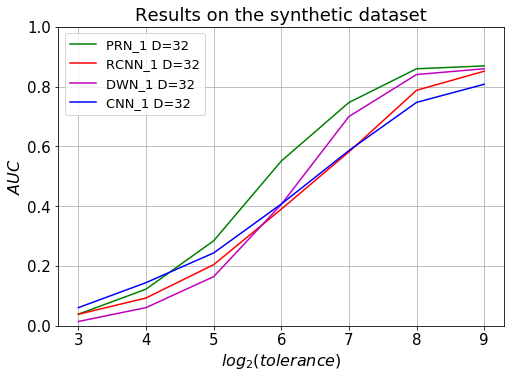

In [27]:
plt.figure(figsize=(8,5.5))
plt.plot(np.log2(tolerance[:]),tol_auc_PRN32_1[:],'g',label ='PRN_1 D=32')
plt.plot(np.log2(tolerance[:]),tol_auc_RCNN32_1[:],'r',label ='RCNN_1 D=32')
plt.plot(np.log2(tolerance[:]),tol_auc_DWN32_1[:],'m',label ='DWN_1 D=32')
plt.plot(np.log2(tolerance[:]),tol_auc_CNN32_1[:],'b',label ='CNN_1 D=32')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='upper left', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('$log_2(tolerance)$', fontsize = 16)
plt.ylabel('$AUC$', fontsize = 16)
plt.title('Results on the synthetic dataset')
# show the results
plt.show()

#save the results
#plt.savefig('../plot/plt1.png', bbox_inches = 'tight')

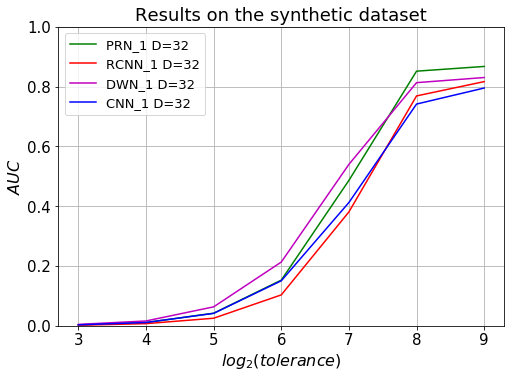

In [32]:
plt.figure(figsize=(8,5.5))
plt.plot(np.log2(tolerance[:]),tol_auc_PRN32_x[:],'g',label ='PRN_1 D=32')
plt.plot(np.log2(tolerance[:]),tol_auc_RCNN32_x[:],'r',label ='RCNN_1 D=32')
plt.plot(np.log2(tolerance[:]),tol_auc_DWN32_x[:],'m',label ='DWN_1 D=32')
plt.plot(np.log2(tolerance[:]),tol_auc_CNN32_x[:],'b',label ='CNN_1 D=32')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='upper left', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('$log_2(tolerance)$', fontsize = 16)
plt.ylabel('$AUC$', fontsize = 16)
plt.title('Results on the synthetic dataset')
# show the results
plt.show()

#save the results
#plt.savefig('../plot/plt1.png', bbox_inches = 'tight')

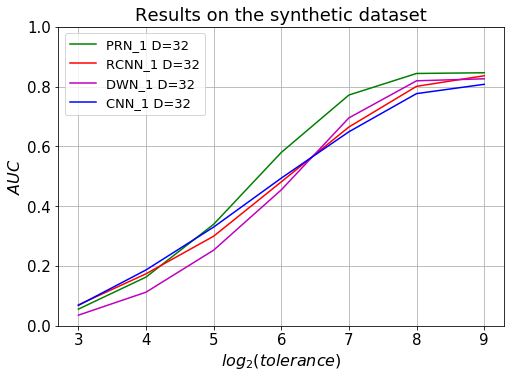

In [39]:
plt.figure(figsize=(8,5.5))
plt.plot(np.log2(tolerance[:]),tol_auc_PRN32_y[:],'g',label ='PRN_1 D=32')
plt.plot(np.log2(tolerance[:]),tol_auc_RCNN32_y[:],'r',label ='RCNN_1 D=32')
plt.plot(np.log2(tolerance[:]),tol_auc_DWN32_y[:],'m',label ='DWN_1 D=32')
plt.plot(np.log2(tolerance[:]),tol_auc_CNN32_y[:],'b',label ='CNN_1 D=32')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='upper left', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('$log_2(tolerance)$', fontsize = 16)
plt.ylabel('$AUC$', fontsize = 16)
plt.title('Results on the synthetic dataset')
# show the results
plt.show()

#save the results
#plt.savefig('../plot/plt1.png', bbox_inches = 'tight')

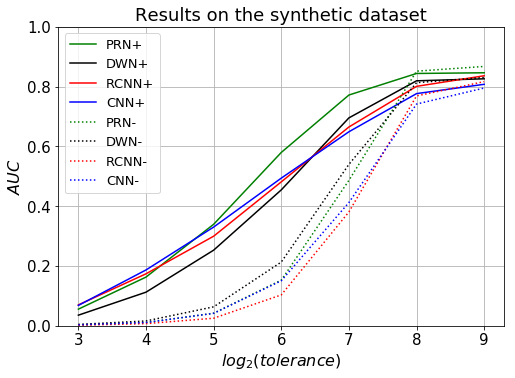

In [43]:
plt.figure(figsize=(8,5.5))
plt.plot(np.log2(tolerance[:]),tol_auc_PRN32_y[:],'g',label ='PRN+')
plt.plot(np.log2(tolerance[:]),tol_auc_DWN32_y[:],'k',label ='DWN+')
plt.plot(np.log2(tolerance[:]),tol_auc_RCNN32_y[:],'r',label ='RCNN+')
plt.plot(np.log2(tolerance[:]),tol_auc_CNN32_y[:],'b',label ='CNN+')

plt.plot(np.log2(tolerance[:]),tol_auc_PRN32_x[:],':g',label ='PRN-')
plt.plot(np.log2(tolerance[:]),tol_auc_DWN32_x[:],':k',label ='DWN-')
plt.plot(np.log2(tolerance[:]),tol_auc_RCNN32_x[:],':r',label ='RCNN-')
plt.plot(np.log2(tolerance[:]),tol_auc_CNN32_x[:],':b',label ='CNN-')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='upper left', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('$log_2(tolerance)$', fontsize = 16)
plt.ylabel('$AUC$', fontsize = 16)
plt.title('Results on the synthetic dataset')
# show the results
plt.show()

#save the results
#plt.savefig('../../plot/plt4.png', bbox_inches = 'tight')

In [46]:
np.asarray([tol_auc_PRN32_y[3], tol_auc_DWN32_y[3], tol_auc_RCNN32_y[3], tol_auc_CNN32_y[3]]) - np.asarray([tol_auc_PRN32_x[3], tol_auc_DWN32_x[3], tol_auc_RCNN32_x[3], tol_auc_CNN32_x[3]])

array([ 0.42703698,  0.24140845,  0.3780814 ,  0.34334052])

(0.15277453808006658,
 0.21320394315961624,
 0.10334356014439183,
 0.15057024798947932)